# How do you say "šikmý vrh" in English?

*This notebook shows the process to arrive at a solution. It does NOT represent a good notebook. It contains various variants for you to see, instead of replacing the code in each cell with the new version. That is because here we focus on the process, you are supposed to read it sequentially and learn from the mistakes, which are intentionally left there. 
A proper final notebook (inteded to help you find optimal throw angles) would be much cleaner, as you can see in the sample solution.*

## Preparations

We will model the throw as a quite standard projectile motion of a massive point from physics. If you are not sure, take a break to catch up and review it, and come back.
[Wikipedia](https://en.wikipedia.org/wiki/Projectile_motion) has a basic summary, in case a dog ate your sešit.

You need to understand for example:
* The position of the object is defined by its coordinates


Feel free to scribble a few figures!

## The question: at what angle do I need to throw the thing, to make it fly the furthest?

We need to model the whole process. What are the key variables? Let' define them!

In [13]:
import math

G = -9.81  # Gravity
v_0 = 50.0  # Initial velocity (m/s)
angle = 75 # this is the angle I want to try
# what else?

# starting point
x0, y0 = 0, 0

When in need, use the documentation. Or just try finding a page that contains your question and answer (it has been asked many times before!). So, how do we calculate sines and cosines in Python?

### Velocity vectors

Remember how to load new functions?

Check the partial results - do they match your expectations? Or should we change something?

sin/cos check, ways to overcome

### Fixing goniometry

In [14]:
import math
v_x = v_0 * math.cos(angle)  # Horizontal velocity
v_y = v_0 * math.cos(math.pi/2 - angle)  # Vertical velocity

## Steps to simulation

singular steps

## Automating the steps

test it, wrong condition, endless loop
adding gravity

Now finally, run the simulation. Proceed step-wise in a loop. In each step you calculate the new position (and possibly some other quantities).

In [15]:
trajectory_x = []
trajectory_y = []

while y >= 0 :
    trajectory_x.append(x)
    trajectory_y.append(y)
    x = x + v_x
    y = y + v_y
    v_y = v_y - G
# saving tha last position too (already below ground, y < 0)
trajectory_x.append(x)
trajectory_y.append(y)  


## Visualization

We use the provided sample code.

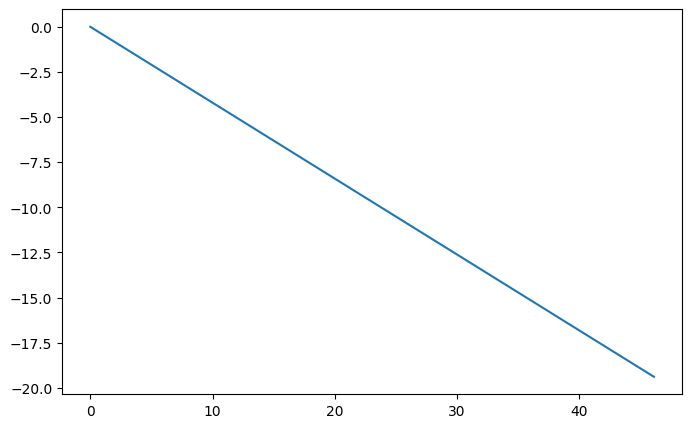

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))  # Create a new plot
plt.plot(trajectory_x, trajectory_y)  # Plot the flight path
plt.show()  # Show the plot

The graph comes with several issues though. We can not actually use it to answer our question.

hranatý, nad nulou, průsečík není vidět
označení os, jednotek... dohledáním v dokumentaci
rozměrová analýza a přidání dt

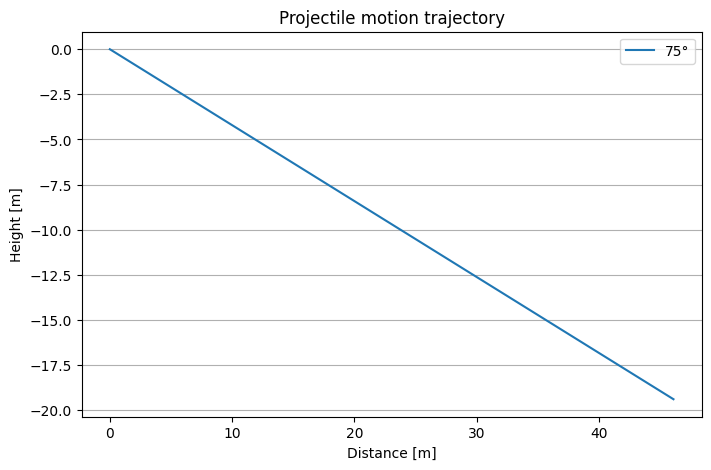

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Create a new plot
plt.plot(trajectory_x, trajectory_y, label=str(angle)+"°")  # Plot the flight path
plt.title("Projectile motion trajectory")  # Set title
plt.xlabel("Distance [m]")  # Set x-axis label
plt.ylabel("Height [m]")  # Set y-axis label
plt.grid(axis='y')  # Add grid lines only along the x-axis
plt.legend()  # Show legend

plt.show()  # Show the plot

## Finding the optimal angle one by one

That is what we can do now: Mark down the resulting range for each tested angle, and keep testing angles - scroll up, change parameters, run the cells, evaluate the results, repeat until we are satisfied (when changing the angle does not bring any meaningful change to the range).

Or maybe we can delegate this dull work to the computer.

# Testing multiple angles at once

We might put the simulation itself (the loop of steps along the flight) into a loop, which would calculate the trajectories for different angles, and then plot them all into one figure.


## The `range` function


First we need to generate the list of angles we want to test. Play with the `range` function, until you understand the parameters ang generate an appropriate list of angles.

In [22]:
angles = list(range(10, 80, 6))
angles   # so that we see what we generated

[10, 16, 22, 28, 34, 40, 46, 52, 58, 64, 70, 76]

## One large simulation cell

We could now run a code like this:
```
plt.figure(figsize=(8, 5))
for angle in angles :
    - calculate the new v_x, v_y
    - reset initial values, namely x,y
    - run the simulation, store data into trajectory lists
    - plot the new trajecoty into the plot
plt.show()
```
Try combining pieces of the previous codes to make this work before continuing further.

### Solution to the large simulation cell

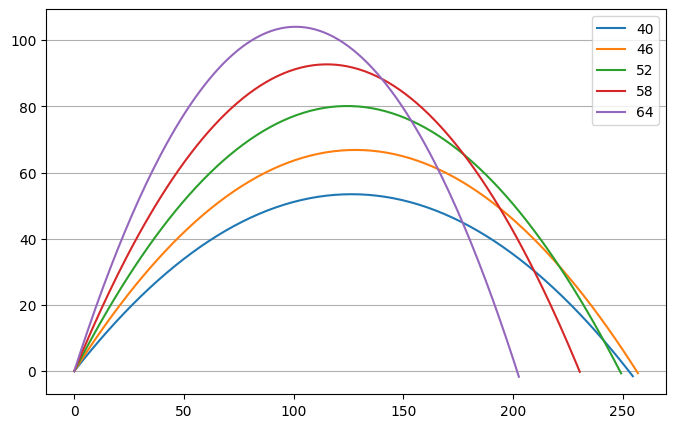

In [24]:
import matplotlib.pyplot as plt
import math
dt=0.05
plt.figure(figsize=(8, 5))
for angle in angles[5:10]:
    angleRad = math.radians(angle)
    x, y = 0, 0
    v_x = v_0 * math.cos(angleRad)
    v_y = v_0 * math.cos(math.pi/2-angleRad)
    trajectory_x = []
    trajectory_y = []
    while y >= 0:
        trajectory_x.append(x)
        trajectory_y.append(y)
        x = x + v_x*dt
        y += v_y*dt
        v_y += G*dt
    trajectory_x.append(x)
    trajectory_y.append(y)
    plt.plot(trajectory_x[:], trajectory_y[:], label=str(angle))
plt.legend()
plt.grid(axis='y')  # Add grid lines only along the x-axis
plt.show()


*By the way, you can play around with this. You can for example try to keep the `angle` constant, but changing `dt` for every simulation. How is it going to look like?*

## Improvements

better structure? zooming into the graph?
lists of lists!
because we want to redraw the plot a few times, without running the same simulation every time

In [20]:

trs = []
for angle in angles:
    trs.append(sim(x0, y0, v0, angle))



NameError: name 'sim' is not defined

In [ ]:
import matplotlib.pyplot as plt


Find out possibilities to vyňuňat the chart. And do it. Labels, grids, colors...

**And finally, edit the notebook however you need to find out the answer to the original question.**

Possible modification: we do not shoot on the ground, but from a tower of some height.

## Sidequest

*You may skip section this if you don't feel like it. But this is what happens when exploring the world through data, so I decided to leave it here.*

That last observation suggests a symmetry. I can not help it, I want to see it. I will estimate the final range for each angle very roughly. The last coordinate in each trajectory is the first under ground level. Taking the average of the last two points should be close to the point of impact.

In [ ]:
angles=[]
ranges=[]
for result in results:
    angles.append(result[2])
    ranges.append(sum(result[0][-2:])/2)
plt.figure(figsize=(8, 5))
plt.plot(angles, ranges)
plt.title("Projectile motion ranges dependence on angle")
plt.xlabel("Angle [°]")
plt.ylabel("Range [m]")
plt.show()

NameError: name 'results' is not defined

Well this is weird. It seems like taking the average of the two coordinates is not a good estimatte. Maybe we should interpolate properly. Name the two points $A$ and $B$ and assume linear motion on that short segment. Instead of the middle we take a proportion. The ratio of the differences in coordinates gives us the slope, which allows us to calculate the change in the coordinates. The standard form is for $y$:

$y = y_A + \frac{(y_B - y_A)}{(x_B - x_A)} (x - x_A)$

The point of impact is at $y=0$ and we need to find $x$, leading to:

$x = x_A - \frac{y_A (x_B - x_A)}{y_B - y_A}​$

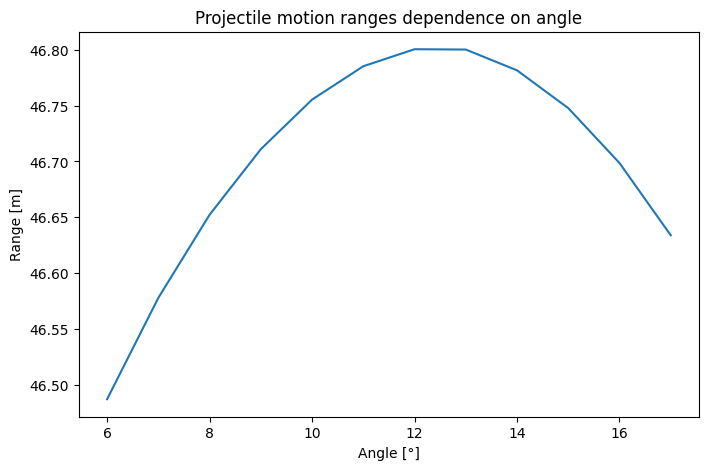

In [ ]:
angles=[]
ranges=[]
for result in results:
    angles.append(result[2])
    x_A, x_B = result[0][-2:]
    y_A, y_B = result[1][-2:]
    ranges.append(x_A-y_A*(x_B-x_A)/(y_B-y_A))
plt.figure(figsize=(8, 5))
plt.plot(angles, ranges)
plt.title("Projectile motion ranges dependence on angle")
plt.xlabel("Angle [°]")
plt.ylabel("Range [m]")
plt.show()

Intellectual satisfaction aside, we can now be more confident in our estimate of the optimal angle.

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
@widgets.interact(x=(0, 10))
def update(x=5):
    plt.plot([0, x], [0, x**2])
    plt.xlim(0, 10)
    plt.ylim(0, 100)
    plt.show()

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

interaktivní graf asi: https://stackoverflow.com/questions/52859983/interactive-matplotlib-figures-in-google-colab

https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets